<div style="background-color: #60DBD8; color: black; text-align: center; padding: 10px; border-radius: 20px; margin-top: 20px; margin-bottom: 20px;">
  <h2 style="margin: 0;">Imports</h2>
</div>


In [1]:
# %pip install --upgrade pip
# %pip install numpy==1.26.4
# %pip install pandas==1.3.0
# %pip install scipy==1.14.0
# %pip install matplotlib seaborn opencv-python-headless tensorflow tqdm scikit-learn prettytable ipywidgets pillow

In [2]:
import sys
import subprocess
import pkg_resources

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# Listting of packages and their desired versions
packages = {
    "numpy": "1.26.4",
    "pandas": "2.2.2",
    "scipy": "1.14.0",
    "matplotlib": "",
    "seaborn": "",
    "opencv-python-headless": "",
    "tensorflow": "2.17.0",
    "tqdm": "",
    "scikit-learn": "",
    "prettytable": "",
    "ipywidgets": "",
    "pillow": ""
}

# Checking and install the packages
for package, version in packages.items():
    try:
        if version:
            pkg_resources.require(f"{package}=={version}")
        else:
            pkg_resources.require(package)
        print(f"{package} is installed and meets the version requirement.")
    except pkg_resources.DistributionNotFound:
        print(f"{package} is not installed. Installing...")
        install(f"{package}=={version}" if version else package)
    except pkg_resources.VersionConflict:
        print(f"{package} version conflict detected. Reinstalling the correct version...")
        install(f"{package}=={version}" if version else package)

# Importing and check the installations
try:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    import cv2
    import tensorflow as tf
    import tqdm
    import sklearn
    import prettytable
    import ipywidgets
    import PIL
    print("All packages are correctly installed.")
except ImportError as e:
    print(f"An error occurred: {e}")

print("Setup verification complete.")


numpy is installed and meets the version requirement.
pandas is installed and meets the version requirement.
scipy is installed and meets the version requirement.
matplotlib is installed and meets the version requirement.
seaborn is installed and meets the version requirement.
opencv-python-headless is installed and meets the version requirement.
tensorflow is installed and meets the version requirement.
tqdm is installed and meets the version requirement.
scikit-learn is installed and meets the version requirement.
prettytable is installed and meets the version requirement.
ipywidgets is installed and meets the version requirement.
pillow is installed and meets the version requirement.
All packages are correctly installed.
Setup verification complete.


In [3]:
# %pip install pandas numpy matplotlib seaborn opencv-python-headless tensorflow tqdm scikit-learn prettytable ipywidgets pillow
# %pip install tensorflow scikit-learn


In [4]:
# %pip show tensorflow

In [5]:
# %pip install split-folders

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
# For ML Models
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.losses import *
from tensorflow.keras.models import *
from tensorflow.keras.metrics import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications import *
from tensorflow.keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications import EfficientNetV2B0
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications import EfficientNetV2B0
from tensorflow.keras.applications import EfficientNetV2B3
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings
import splitfolders
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from prettytable import PrettyTable
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

from tensorflow.keras.applications.resnet_v2 import preprocess_input as resnet_preprocess_input


<div style="background-color: #60DBD8; color: black; text-align: center; padding: 10px; border-radius: 20px; margin-top: 20px; margin-bottom: 20px;">
  <h2 style="margin: 0;">Seed</h2>
</div>


In [7]:
tf.random.set_seed(42)
np.random.seed(42)

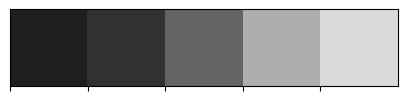

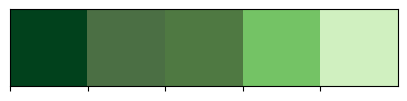

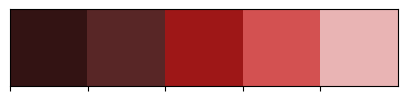

In [8]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)

<div style="background-color: #60DBD8; color: black; text-align: center; padding: 10px; border-radius: 20px; margin-top: 20px; margin-bottom: 20px;">
  <h2 style="margin: 0;">Data Import and split 80-20</h2>
</div>


In [9]:
labels = ['glioma','notumor','meningioma','pituitary']

In [10]:
TRAIN_DIR = r'MedicalImages\\Training'
splitfolders.ratio(TRAIN_DIR, output="DataSplit", ratio=(0.8, 0.2))

Copying files: 5712 files [00:30, 188.34 files/s]


In [11]:
X_train = []
y_train = []
image_size = 224
for i in labels:
    folderPath = os.path.join(r'DataSplit\\','x_train80%',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)
  
 
    
X_val = []
y_val = []
for i in labels:
    folderPath = os.path.join(r'DataSplit\\','y_train20%',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_val.append(img)
        y_val.append(i)
        

X_test = []
y_test = []
        
for i in labels:
    folderPath = os.path.join(r'MedicalImages\\','Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_test.append(img)
        y_test.append(i)
        
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)
X_test = np.array(X_test)
y_test = np.array(y_test)

  0%|          | 0/1056 [00:00<?, ?it/s]

100%|██████████| 300/300 [00:01<00:00, 180.38it/s]


In [12]:
print('Training 80%')
print(X_train.shape)
print('Training 20%')
print(X_val.shape)
print('Test')
print(X_test.shape)

Training 80%
(4568, 224, 224, 3)
Training 20%
(1144, 224, 224, 3)
Test
(1311, 224, 224, 3)


<div style="background-color: #60DBD8; color: black; text-align: center; padding: 10px; border-radius: 20px; margin-top: 20px; margin-bottom: 20px;">
  <h2 style="margin: 0;">Show train data in charts</h2>
</div>

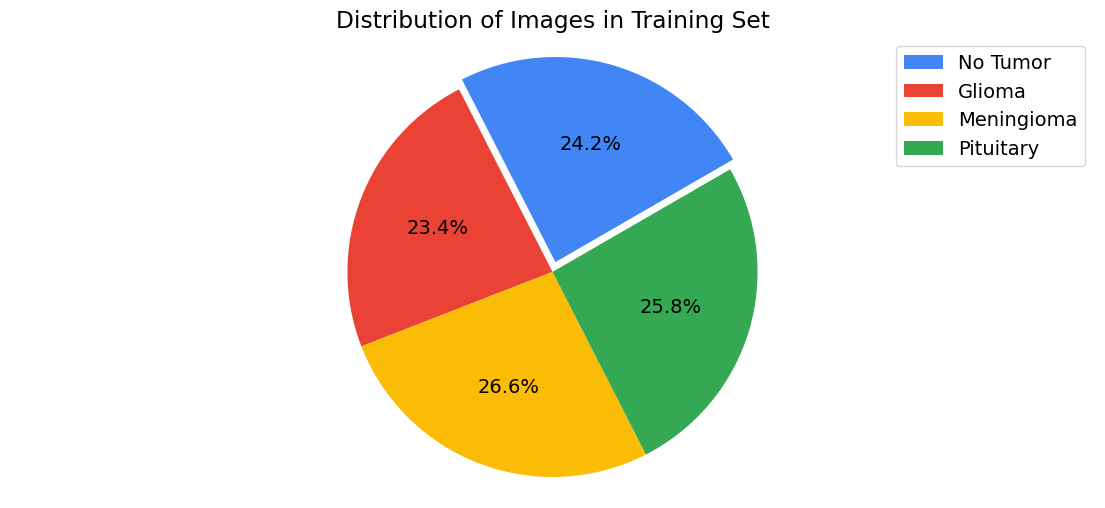

In [13]:
# Get the number of images for each label from the Counter dictionaries
notumor_count = len(r'DataSplit\\x_train80%\\notumor')
glioma_count = len(r'DataSplit\\x_train80%\\glioma')
meningioma_count = len(r'DataSplit\\x_train80%\\meningioma')
pituitary_count = len(r'DataSplit\\x_train80%\\pituitary')

# Create a list of numerical values that represent the number of images for each label
sizes = [notumor_count, glioma_count, meningioma_count, pituitary_count]

# Set up the plot
plt.figure(figsize=(14,6))
colors = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
plt.rcParams.update({'font.size': 14})
plt.pie(sizes, colors=colors, autopct='%.1f%%', explode=(0.05,0,0,0),
        startangle=30);

# Add labels to the plot
labels = ['No Tumor', 'Glioma', 'Meningioma', 'Pituitary']
plt.legend(labels, loc='best')
plt.axis('equal')
plt.title('Distribution of Images in Training Set')
plt.show()


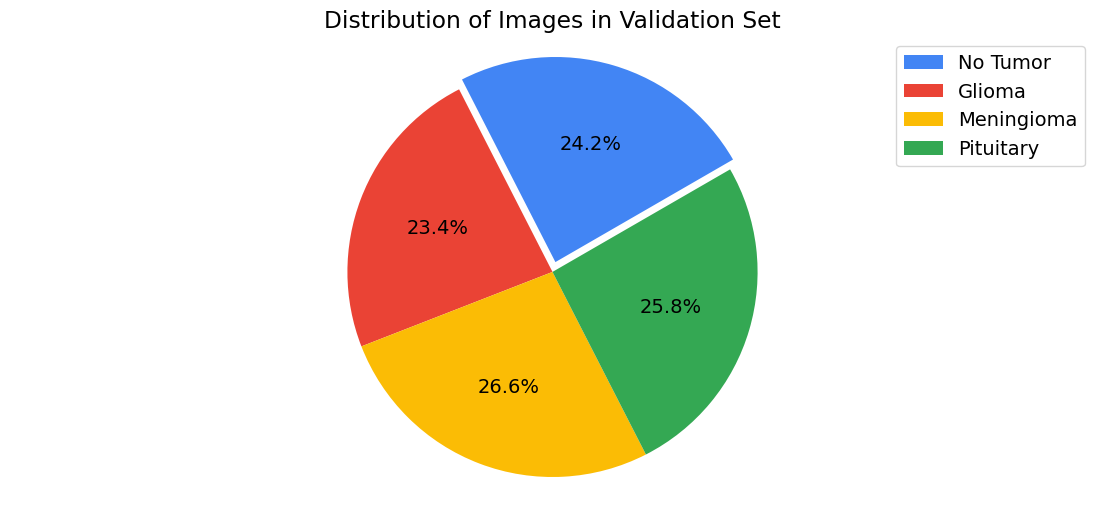

In [14]:
# Get the number of images for each label from the Counter dictionaries
notumor_count = len(r'DataSplit\\y_train20%\\notumor')
glioma_count = len(r'DataSplit\\y_train20%\\glioma')
meningioma_count = len(r'DataSplit\\y_train20%\\meningioma')
pituitary_count = len(r'DataSplit\\y_train20%\\pituitary')

# Create a list of numerical values that represent the number of images for each label
sizes = [notumor_count, glioma_count, meningioma_count, pituitary_count]

# Set up the plot
plt.figure(figsize=(14,6))
colors = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
plt.rcParams.update({'font.size': 14})
plt.pie(sizes, colors=colors, autopct='%.1f%%', explode=(0.05,0,0,0),
        startangle=30);

# Add labels to the plot
labels = ['No Tumor', 'Glioma', 'Meningioma', 'Pituitary']
plt.legend(labels, loc='best')
plt.axis('equal')
plt.title('Distribution of Images in Validation Set')
plt.show()

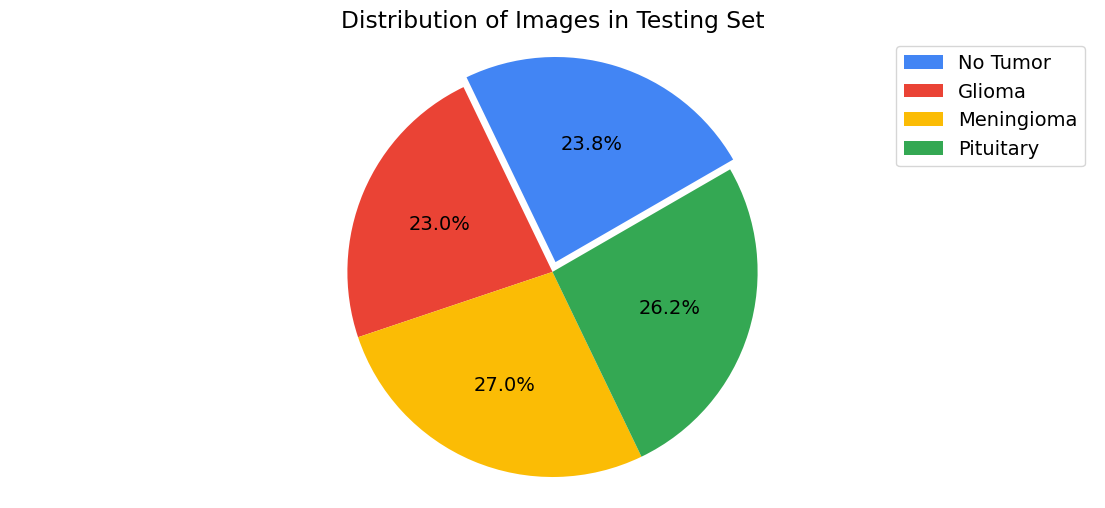

In [15]:
# Get the number of images for each label from the Counter dictionaries
notumor_count = len(r'MedicalImages\Testing\\notumor')
glioma_count = len(r'MedicalImages\Testing\\glioma')
meningioma_count = len(r'MedicalImages\\Testing\\meningioma')
pituitary_count = len(r'MedicalImages\\Testing\\pituitary')

# Create a list of numerical values that represent the number of images for each label
sizes = [notumor_count, glioma_count, meningioma_count, pituitary_count]

# Set up the plot
plt.figure(figsize=(14,6))
colors = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
plt.rcParams.update({'font.size': 14})
plt.pie(sizes, colors=colors, autopct='%.1f%%', explode=(0.05,0,0,0),
        startangle=30);

# Add labels to the plot
labels = ['No Tumor', 'Glioma', 'Meningioma', 'Pituitary']
plt.legend(labels, loc='best')
plt.axis('equal')
plt.title('Distribution of Images in Testing Set')
plt.show()

<div style="background-color: #60DBD8; color: black; text-align: center; padding: 10px; border-radius: 20px; margin-top: 20px; margin-bottom: 20px;">
  <h2 style="margin: 0;">One-Hot Encoding</h2>
</div>


In [16]:
labels = ['glioma','notumor','meningioma','pituitary']

In [17]:
y_train_new = []
for i in y_train:
  y_train_new.append(labels.index(i))

y_train = tf.keras.utils.to_categorical(y_train_new)
y_val_new = []
for i in y_val:
 y_val_new.append(labels.index(i))
y_val = tf.keras.utils.to_categorical(y_val_new)
y_test_new = []
for i in y_test:
 y_test_new.append(labels.index(i))
y_test = tf.keras.utils.to_categorical(y_test_new)


In [18]:

# Scaling Train, Valid and Test Features
X_train_scaled = X_train.astype('float32')
X_val_scaled = X_val.astype('float32')
X_test_scaled = X_test.astype('float32')
X_train_scaled /= 255.
X_val_scaled /= 255.
X_test_scaled /= 255.


In [19]:
minvalue = np.min(X_train)
maxvalue = np.max(X_train)
minvalues = np.min(X_train_scaled)
maxvalues = np.max(X_train_scaled)
print(minvalue)
print(maxvalue)
print(minvalues)
print(maxvalues)

0
255
0.0
1.0


<div style="background-color: #60DBD8; color: black; text-align: center; padding: 10px; border-radius: 20px; margin-top: 20px; margin-bottom: 20px;">
  <h2 style="margin: 0;">Generic values</h2>
</div>


In [20]:
batch_size = 32              # Batch size for training and validation
num_classes = 4             # Number of classes in the dataset

In [21]:
datagen = ImageDataGenerator(preprocessing_function=preprocess_input)


<div style="background-color: #60DBD8; color: black; text-align: center; padding: 10px; border-radius: 20px; margin-top: 20px; margin-bottom: 20px;">
  <h2 style="margin: 0;">ResNet50</h2>
</div>


In [22]:
# # Define input tensor
# input_tensor = Input(shape=(image_size, image_size, 3))

# # Loading the pre-trained ResNet50 model without the top classification layer
# base_model = ResNet50(weights='imagenet', include_top=False)(input_tensor)

# # Freezing the layers of the pre-trained model
# for layer in base_model.layers:
#     layer.trainable = False

# # Add Flatten and Dense layers
# flatten = Flatten()(base_model)
# output_tensor = Dense(4, activation='softmax')(flatten)

# # Building the new model
# model = Model(inputs=input_tensor, outputs=output_tensor)

# # Compiling the model
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])


prueba

In [29]:
# Define input tensor
input_tensor = Input(shape=(image_size, image_size, 3))

# Loading the pre-trained ResNet50 model without the top classification layer
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=input_tensor)

# Freezing the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Add Flatten and Dense layers
flatten = Flatten()(base_model.output)
output_tensor = Dense(4, activation='softmax')(flatten)

# Building the new model
model = Model(inputs=base_model.input, outputs=output_tensor)

# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

prueba

In [30]:
# Defining the checkpoint
filepath = "weightsbestTesNet50100%scaled.keras"  # Updated extension
checkpoint = ModelCheckpoint(filepath, monitor='val_categorical_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]


In [31]:
historyres = model.fit(datagen.flow(X_train_scaled, y_train, batch_size=32),
validation_data=(X_val_scaled, y_val),
batch_size=32,
epochs=1,
callbacks=callbacks_list)


c:\Users\eduma\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - categorical_accuracy: 0.5343 - loss: 1.8759
Epoch 1: val_categorical_accuracy improved from -inf to 0.30332, saving model to weightsbestTesNet50100%scaled.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 529s 4s/step - categorical_accuracy: 0.5349 - loss: 1.8714 - val_categorical_accuracy: 0.3033 - val_loss: 11.5932


<div style="background-color: #60DBD8; color: black; text-align: center; padding: 10px; border-radius: 20px; margin-top: 20px; margin-bottom: 20px;">
  <h2 style="margin: 0;">VGG16</h2>
</div>


In [32]:
# # Loading the pre-trained VGG16 model without the top classification layer
# v = VGG16(weights='imagenet', input_shape=(image_size, image_size, 3), include_top=False)

# # Freezing the layers of the pre-trained model
# for layer in v.layers:
#     layer.trainable = False

# # Building the new model
# model = Sequential()
# model.add(v)
# model.add(Flatten())
# model.add(Dense(4, activation='softmax'))  # 4 classes in the output layer

# # Compiling the model
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

# # Defining the checkpoint
# filepath = "weightsbestVGG16100%scaled.keras"  # Updated extension
# checkpoint = ModelCheckpoint(filepath, monitor='val_categorical_accuracy', verbose=1, save_best_only=True, mode='max')
# callbacks_list = [checkpoint]

# datagen = ImageDataGenerator(
#     featurewise_center=False,
#     samplewise_center=False,
#     featurewise_std_normalization=False,
#     samplewise_std_normalization=False,
#     zca_whitening=False,
#     rotation_range=10,
#     zoom_range=0.1,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     horizontal_flip=True,
#     vertical_flip=False
# )

# # Fitting the model
# historyVGG16 = model.fit(
#     datagen.flow(X_train_scaled, y_train, batch_size=32),
#     validation_data=(X_val_scaled, y_val),
#     epochs=5,
#     callbacks=callbacks_list
# )


prueba

In [43]:

# Loading the pre-trained VGG16 model without the top classification layer
v = VGG16(weights='imagenet', input_shape=(image_size, image_size, 3), include_top=False)

# Freezing the layers of the pre-trained model
for layer in v.layers:
    layer.trainable = False

# Building the new model using functional API to handle Flatten layer properly
input_tensor = Input(shape=(image_size, image_size, 3))
base_model_output = v(input_tensor, training=False)
flattened_output = Flatten()(base_model_output)
output_tensor = Dense(4, activation='softmax')(flattened_output)

model = tf.keras.Model(inputs=input_tensor, outputs=output_tensor)

# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

# Defining the checkpoint
filepath = "weightsbestVGG16100%scaled.keras"  # Updated extension
checkpoint = ModelCheckpoint(filepath, monitor='val_categorical_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# Data augmentation and preprocessing
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # Ensure VGG16 preprocessing is applied
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False)

# Fitting the model
historyVGG16 = model.fit(
    datagen.flow(X_train_scaled, y_train, batch_size=32),
    validation_data=datagen.flow(X_val_scaled, y_val, batch_size=32),
    epochs=1,
    callbacks=callbacks_list)

143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - categorical_accuracy: 0.6600 - loss: 0.9312
Epoch 1: val_categorical_accuracy improved from -inf to 0.88024, saving model to weightsbestVGG16100%scaled.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 1090s 8s/step - categorical_accuracy: 0.6609 - loss: 0.9289 - val_categorical_accuracy: 0.8802 - val_loss: 0.3410


prueba

<div style="background-color: #60DBD8; color: black; text-align: center; padding: 10px; border-radius: 20px; margin-top: 20px; margin-bottom: 20px;">
  <h2 style="margin: 0;">ResNet50 V2</h2>
</div>

In [34]:

# rsv2 = ResNet50V2(weights='imagenet', input_shape=(image_size, image_size, 3), include_top=False)
# for layer in rsv2.layers:
#     layer.trainable = False

# modelrsv2 = Sequential()
# modelrsv2.add(rsv2)
# modelrsv2.add(Flatten())
# modelrsv2.add(Dense(4, activation='softmax'))

# modelrsv2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

# checkpoint
# filepath = "weightsbestResNet50V2100%scaled.keras"
# checkpoint = ModelCheckpoint(filepath, monitor='val_categorical_accuracy', verbose=1, save_best_only=True, mode='max')
# callbacks_list = [checkpoint]

# historyrsv2 = modelrsv2.fit(
#     datagen.flow(X_train_scaled, y_train, batch_size=32),
#     validation_data=(X_val_scaled, y_val),
#     batch_size=32,
#     epochs=5,
#     callbacks=callbacks_list
# )


prueba

In [53]:

from tensorflow.keras.applications.resnet_v2 import preprocess_input as resnet_v2_preprocess_input
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input as efficientnet_v2_preprocess_input


# Loading the pre-trained ResNet50V2 model without the top classification layer
rsv2 = ResNet50V2(weights='imagenet', input_shape=(image_size, image_size, 3), include_top=False)
for layer in rsv2.layers:
    layer.trainable = False

# Building the new model
modelrsv2 = Sequential()
modelrsv2.add(rsv2)
modelrsv2.add(Flatten())
modelrsv2.add(Dense(4, activation='softmax'))

# Compiling the model
modelrsv2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

# Defining the checkpoint
filepath = "weightsbestResNet50V2100%scaled.keras"
checkpoint = ModelCheckpoint(filepath, monitor='val_categorical_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# Data augmentation and preprocessing
datagen = ImageDataGenerator(
    preprocessing_function=resnet_v2_preprocess_input,  # Ensure ResNet50V2 preprocessing is applied
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)

# Fitting the model
historyrsv2 = modelrsv2.fit(
    datagen.flow(X_train_scaled, y_train, batch_size=32),
    validation_data=datagen.flow(X_val_scaled, y_val, batch_size=32),
    epochs=1,
    callbacks=callbacks_list
)

143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - categorical_accuracy: 0.5353 - loss: 1.9335
Epoch 1: val_categorical_accuracy improved from -inf to 0.65035, saving model to weightsbestResNet50V2100%scaled.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 631s 4s/step - categorical_accuracy: 0.5357 - loss: 1.9302 - val_categorical_accuracy: 0.6503 - val_loss: 0.9644


prueba

<div style="background-color: #60DBD8; color: black; text-align: center; padding: 10px; border-radius: 20px; margin-top: 20px; margin-bottom: 20px;">
  <h2 style="margin: 0;">ENV2B0</h2>
</div>

In [36]:
# # Defining the model
# env2b0 = EfficientNetV2B0(weights='imagenet', input_shape=(image_size, image_size, 3), include_top=False, include_preprocessing=False)
# for layer in env2b0.layers:
#     layer.trainable = False

# modelenv2b0 = Sequential()
# modelenv2b0.add(env2b0)
# modelenv2b0.add(Flatten())
# modelenv2b0.add(Dense(4, activation='softmax'))

# modelenv2b0.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

# # Checkpoint
# filepath = "weightsbestENV2B0100%scaled.keras"  # .keras extension
# checkpoint = ModelCheckpoint(filepath, monitor='val_categorical_accuracy', verbose=1, save_best_only=True, mode='max')
# callbacks_list = [checkpoint]

# # Fitting the model
# historyenv2b0 = modelenv2b0.fit(
#     datagen.flow(X_train_scaled, y_train, batch_size=32),
#     validation_data=(X_val_scaled, y_val),
#     batch_size=32,
#     epochs=5,
#     callbacks=callbacks_list
# )

prueba

In [56]:
# Define input tensor
input_tensor = Input(shape=(image_size, image_size, 3))

# Loading the pre-trained EfficientNetV2B0 model without the top classification layer
base_model = EfficientNetV2B0(weights='imagenet', include_top=False, input_tensor=input_tensor)

# Freezing the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Add Flatten and Dense layers
x = Flatten()(base_model.output)
output_tensor = Dense(4, activation='softmax')(x)

# Building the new model
modelenv2b0 = Model(inputs=input_tensor, outputs=output_tensor)

# Compiling the model
modelenv2b0.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

# Checkpoint
filepath = "weightsbestENV2B0100%scaled.keras"
checkpoint = ModelCheckpoint(filepath, monitor='val_categorical_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# Data augmentation and preprocessing
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # Ensure EfficientNetV2 preprocessing is applied
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)

# Fitting the model
historyenv2b0 = modelenv2b0.fit(
    datagen.flow(X_train_scaled, y_train, batch_size=32),
    validation_data=datagen.flow(X_val_scaled, y_val, batch_size=32),
    epochs=1,
    callbacks=callbacks_list
)

# Save the model
modelenv2b0.save(filepath)

c:\Users\eduma\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - categorical_accuracy: 0.2819 - loss: 5.0432
Epoch 1: val_categorical_accuracy improved from -inf to 0.30157, saving model to weightsbestENV2B0100%scaled.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 399s 3s/step - categorical_accuracy: 0.2819 - loss: 5.0294 - val_categorical_accuracy: 0.3016 - val_loss: 1.3697


prueba

<div style="background-color: #60DBD8; color: black; text-align: center; padding: 10px; border-radius: 20px; margin-top: 20px; margin-bottom: 20px;">
  <h2 style="margin: 0;">Personalized</h2>
</div>

In [38]:
# modelP = Sequential()
# modelP.add(Flatten(input_shape=(image_size, image_size, 3)))
# modelP.add(Dense(4, activation='softmax'))

# modelP.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

# # Define the name of the file for saving the models
# filepath = "weightsbestPersonal100%scaled.keras"  # Changed to .keras extension

# # Set up ModelCheckpoint
# checkpoint = ModelCheckpoint(filepath, monitor='val_categorical_accuracy', verbose=1, save_best_only=True, mode='max')
# callbacks_list = [checkpoint]

# # Train the model
# historyPers = modelP.fit(
#     datagen.flow(X_train_scaled, y_train, batch_size=32),
#     validation_data=(X_val_scaled, y_val),
#     batch_size=32,
#     epochs=5,
#     callbacks=callbacks_list
# )

prueba

In [40]:
# Building the model
modelP = Sequential()
modelP.add(Flatten(input_shape=(image_size, image_size, 3)))
modelP.add(Dense(4, activation='softmax'))

modelP.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

# Define the name of the file for saving the models
filepath = "weightsbestPersonal100%scaled.keras"  # Changed to .keras extension

# Set up ModelCheckpoint
checkpoint = ModelCheckpoint(filepath, monitor='val_categorical_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# Data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)

# Train the model
historyPers = modelP.fit(
    datagen.flow(X_train_scaled, y_train, batch_size=32),
    validation_data=datagen.flow(X_val_scaled, y_val, batch_size=32),
    epochs=1,
    callbacks=callbacks_list
)

141/143 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step - categorical_accuracy: 0.3317 - loss: 1.2931
Epoch 1: val_categorical_accuracy improved from -inf to 0.47203, saving model to weightsbestPersonal100%scaled.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 118s 779ms/step - categorical_accuracy: 0.3328 - loss: 1.2922 - val_categorical_accuracy: 0.4720 - val_loss: 1.1690


prueba

<div style="background-color: #60DBD8; color: black; text-align: center; padding: 10px; border-radius: 20px; margin-top: 20px; margin-bottom: 20px;">
  <h2 style="margin: 0;">Predictions</h2>
</div>

In [57]:
modelpred1 = load_model('weightsbestTesNet50100%scaled.keras')

modelpred2 = load_model('weightsbestVGG16100%scaled.keras')

#modelpred3 = load_model('weightsbestResNet50V2100%scaled.keras')

modelpred3 = load_model('weightsbestENV2B0100%scaled.keras')

modelpred4 = load_model('weightsbestPersonal100%scaled.keras')


In [59]:
# Obtening Original labels for testing
y_true = np.argmax(y_test,axis=1)

# Labels de TesNet50100
y_pred1 = modelpred1.predict(X_test_scaled)
y_pred1 = np.argmax(y_pred1,axis=1)
# Labels de VGG16100
y_pred2 = modelpred2.predict(X_test_scaled)
y_pred2 = np.argmax(y_pred2,axis=1)
# # Labels de ResNet50V2100
# y_pred3 = modelpred3.predict(X_test_scaled)
# y_pred3 = np.argmax(y_pred3,axis=1)
# Labels de ENV2B0100
y_pred3 = modelpred3.predict(X_test_scaled)
y_pred3 = np.argmax(y_pred4,axis=1)
# Labels de Personal
y_pred4 = modelpred4.predict(X_test_scaled)
y_pred4= np.argmax(y_pred5,axis=1)


 9/41 ━━━━━━━━━━━━━━━━━━━━ 1:34 3s/step

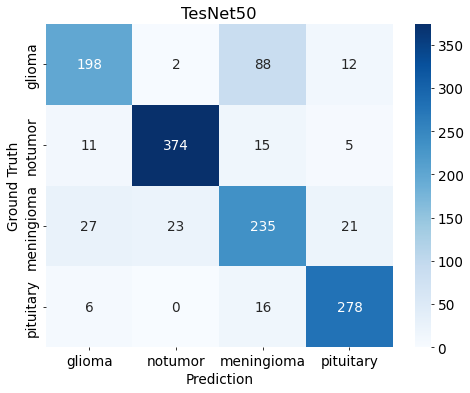

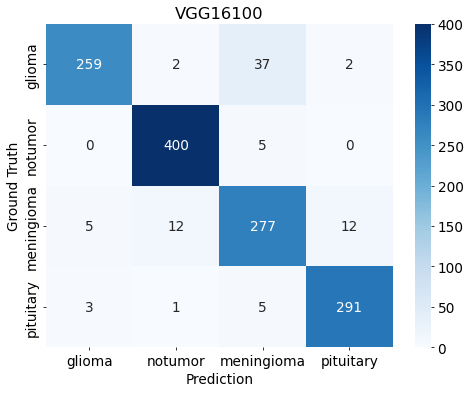

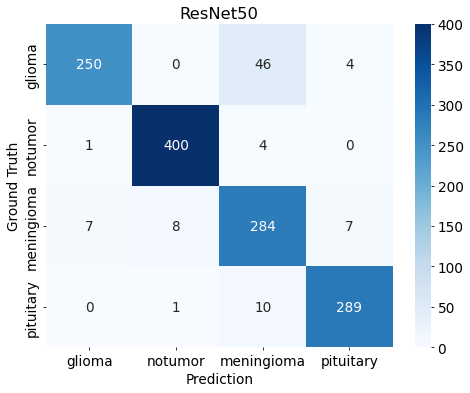

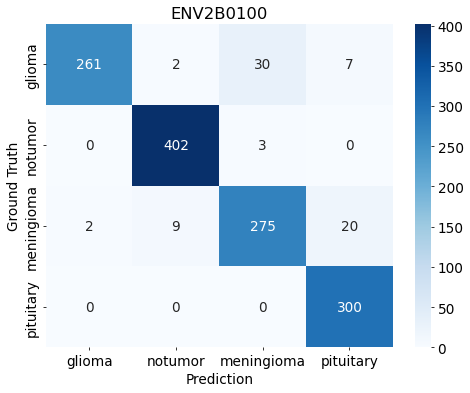

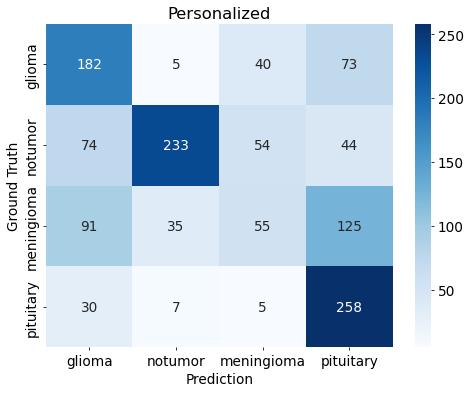

In [ ]:

cnf = confusion_matrix(y_true, y_pred1)
plt.figure(figsize=(8,6), dpi=70, facecolor='w', edgecolor='k')
ax = sns.heatmap(cnf, cmap='Blues', annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
plt.title('TesNet50')
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.show(ax)
cnf = confusion_matrix(y_true, y_pred2)
plt.figure(figsize=(8,6), dpi=70, facecolor='w', edgecolor='k')
ax = sns.heatmap(cnf, cmap='Blues', annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
plt.title('VGG16100')
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.show(ax)
# cnf = confusion_matrix(y_true, y_pred3)
# plt.figure(figsize=(8,6), dpi=70, facecolor='w', edgecolor='k')
# ax = sns.heatmap(cnf, cmap='Blues', annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
# plt.title('ResNet50')
# plt.xlabel('Prediction')
# plt.ylabel('Ground Truth')
# plt.show(ax)
cnf = confusion_matrix(y_true, y_pred3)
plt.figure(figsize=(8,6), dpi=70, facecolor='w', edgecolor='k')
ax = sns.heatmap(cnf, cmap='Blues', annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
plt.title('ENV2B0')
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.show(ax)
cnf = confusion_matrix(y_true, y_pred4)
plt.figure(figsize=(8,6), dpi=70, facecolor='w', edgecolor='k')
ax = sns.heatmap(cnf, cmap='Blues', annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
plt.title('Personalized')
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.show(ax)

In [ ]:
print('TesNet50' + classification_report(y_true, y_pred1))
print('-------------------------------------------------------------------------')
print('VGG16100' + classification_report(y_true, y_pred2))
print('-------------------------------------------------------------------------')
# print('ResNet50' + classification_report(y_true, y_pred3))
# print('-------------------------------------------------------------------------')
print('ENV2B0' + classification_report(y_true, y_pred3))
print('-------------------------------------------------------------------------')
print('Personalized' + classification_report(y_true, y_pred4))
print('--------------------------------------------------')

TesNet50              precision    recall  f1-score   support

           0       0.82      0.66      0.73       300
           1       0.94      0.92      0.93       405
           2       0.66      0.77      0.71       306
           3       0.88      0.93      0.90       300

    accuracy                           0.83      1311
   macro avg       0.82      0.82      0.82      1311
weighted avg       0.83      0.83      0.83      1311

-------------------------------------------------------------------------
VGG16100              precision    recall  f1-score   support

           0       0.97      0.86      0.91       300
           1       0.96      0.99      0.98       405
           2       0.85      0.91      0.88       306
           3       0.95      0.97      0.96       300

    accuracy                           0.94      1311
   macro avg       0.94      0.93      0.93      1311
weighted avg       0.94      0.94      0.94      1311

----------------------------------------

In [ ]:
# Columnas de la tabla
t = PrettyTable(['Model', 'Accuracy', 'glioma','meningioma', 'notumor', 'pituitary'])
# To insert rows:
t.add_row(['TesNet50',,,,, ])
t.add_row(['VGG16100',,,,,  ])
# t.add_row(['ResNet50',,,,, ])
t.add_row(['ENV2B',,,,, ])
t.add_row(['Personalized',,,,,  ])
print(t)


+--------------+----------+--------+------------+---------+-----------+
|    Model     | Accuracy | glioma | meningioma | notumor | pituitary |
+--------------+----------+--------+------------+---------+-----------+
|   TesNet50   |   0.83   |  0.82  |    0.94    |   0.66  |    0.88   |
|   VGG16100   |   0.94   |  0.97  |    0.96    |   0.85  |    0.95   |
|   ResNet50   |   0.94   |  0.97  |    0.98    |   0.83  |    0.96   |
|    ENV2B     |   0.95   |  0.99  |    0.97    |   0.89  |    0.92   |
| Personalized |   0.57   |  0.48  |    0.83    |   0.36  |    0.52   |
+--------------+----------+--------+------------+---------+-----------+


<div style="background-color: #60DBD8; color: black; text-align: center; padding: 10px; border-radius: 20px; margin-top: 20px; margin-bottom: 20px;">
  <h2 style="margin: 0;">Data Import and split 70-30</h2>
</div>

In [ ]:
TRAIN_DIR = r'MedicalImages\\Training'
splitfolders.ratio(TRAIN_DIR, output="DataSplit", ratio=(0.7, 0.3))

Copying files: 5712 files [00:22, 254.12 files/s]


In [ ]:
X_train = []
y_train = []
image_size = 150
for i in labels:
    folderPath = os.path.join(r'DataSplit\\','x_train70%',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)
 
    
X_val = []
y_val = []
for i in labels:
    folderPath = os.path.join(r'C:DataSplit\\','y_train30%',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_val.append(img)
        y_val.append(i)
        

X_test = []
y_test = []
        
for i in labels:
    folderPath = os.path.join(r'MedicalImages\\','Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_test.append(img)
        y_test.append(i)
        
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)
X_test = np.array(X_test)
y_test = np.array(y_test)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\\\Users\\\\eduma\\\\OneDrive\\\\Escritorio\\\\CA3\\\\StrategicThinkingCA3-\\\\StrategicThinkingCA3\\\\DataSplit\\\\x_train70%\\No Tumor'

In [ ]:
print('Training 70%')
print(X_train.shape)
print('Training 30%')
print(X_val.shape)
print('Test')
print(X_test.shape)

Training 70%
(4568, 150, 150, 3)
Training 30%
(1144, 150, 150, 3)
Test
(1311, 150, 150, 3)


<div style="background-color: #60DBD8; color: black; text-align: center; padding: 10px; border-radius: 20px; margin-top: 20px; margin-bottom: 20px;">
  <h2 style="margin: 0;">One-Hot Encoding</h2>
</div>

In [ ]:
y_train_new = []
for i in y_train:
 y_train_new.append(labels.index(i))

y_train = tf.keras.utils.to_categorical(y_train_new)
y_val_new = []
for i in y_val:
 y_val_new.append(labels.index(i))
y_val = tf.keras.utils.to_categorical(y_val_new)
y_test_new = []
for i in y_test:
 y_test_new.append(labels.index(i))
y_test = tf.keras.utils.to_categorical(y_test_new)

In [ ]:
# Scaling Train, Valid and Test Features
X_train_scaled = X_train.astype('float32')
X_val_scaled = X_val.astype('float32')
X_test_scaled = X_test.astype('float32')
X_train_scaled /= 255.
X_val_scaled /= 255.
X_test_scaled /= 255.

In [ ]:
minvalue = np.min(X_train)
maxvalue = np.max(X_train)
minvalues = np.min(X_train_scaled)
maxvalues = np.max(X_train_scaled)
print(minvalue)
print(maxvalue)
print(minvalues)
print(maxvalues)

0
255
0.0
1.0


<div style="background-color: #60DBD8; color: black; text-align: center; padding: 10px; border-radius: 20px; margin-top: 20px; margin-bottom: 20px;">
  <h2 style="margin: 0;">ResNet50</h2>
</div>


In [ ]:
# # Loading the pre-trained ResNet50 model without the top classification layer
# res_model = ResNet50(weights='imagenet', input_shape=(image_size, image_size, 3), include_top=False)

# # Freezing the layers of the pre-trained model
# for layer in res_model.layers:
#     layer.trainable = False

# # Building the new model
# model = Sequential()
# model.add(res_model)
# model.add(Flatten())
# model.add(Dense(4, activation='softmax'))  # 4 classes in the output layer

# # Compiling the model
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

In [ ]:
# # Defining the checkpoint
# filepath = "weightsbestTesNet50100%scaled.keras"  # Updated extension
# checkpoint = ModelCheckpoint(filepath, monitor='val_categorical_accuracy', verbose=1, save_best_only=True, mode='max')
# callbacks_list = [checkpoint]

In [ ]:
# historyres = model.fit(datagen.flow(X_train_scaled, y_train, batch_size=32),
# validation_data=(X_val_scaled, y_val),
# batch_size=32,
# epochs=5,
# callbacks=callbacks_list)

Epoch 1/20


c:\Users\eduma\OneDrive\Escritorio\CA3\test\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - categorical_accuracy: 0.4588 - loss: 1.3034
Epoch 1: val_categorical_accuracy improved from -inf to 0.64336, saving model to weightsbestTesNet50100%scaled.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 359s 2s/step - categorical_accuracy: 0.4594 - loss: 1.3018 - val_categorical_accuracy: 0.6434 - val_loss: 0.9086
Epoch 2/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - categorical_accuracy: 0.6326 - loss: 0.9162
Epoch 2: val_categorical_accuracy improved from 0.64336 to 0.74388, saving model to weightsbestTesNet50100%scaled.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 272s 2s/step - categorical_accuracy: 0.6327 - loss: 0.9158 - val_categorical_accuracy: 0.7439 - val_loss: 0.7007
Epoch 3/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - categorical_accuracy: 0.6644 - loss: 0.8393
Epoch 3: val_categorical_accuracy did not improve from 0.74388
143/143 ━━━━━━━━━━━━━━━━━━━━ 275s 2s/step - categorical_accuracy: 0.6644 - loss: 0.8393 - val_categorical_accuracy: 0.7290 - val_loss: 0

<div style="background-color: #60DBD8; color: black; text-align: center; padding: 10px; border-radius: 20px; margin-top: 20px; margin-bottom: 20px;">
  <h2 style="margin: 0;">VGG16</h2>
</div>

In [ ]:
# # Loading the pre-trained VGG16 model without the top classification layer
# v = VGG16(weights='imagenet', input_shape=(image_size, image_size, 3), include_top=False)

# # Freezing the layers of the pre-trained model
# for layer in v.layers:
#     layer.trainable = False

# # Building the new model
# model = Sequential()
# model.add(v)
# model.add(Flatten())
# model.add(Dense(4, activation='softmax'))  # 4 classes in the output layer

# # Compiling the model
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

# # Defining the checkpoint
# filepath = "weightsbestVGG16100%scaled.keras"  # Updated extension
# checkpoint = ModelCheckpoint(filepath, monitor='val_categorical_accuracy', verbose=1, save_best_only=True, mode='max')
# callbacks_list = [checkpoint]

# datagen = ImageDataGenerator(
#     featurewise_center=False,
#     samplewise_center=False,
#     featurewise_std_normalization=False,
#     samplewise_std_normalization=False,
#     zca_whitening=False,
#     rotation_range=10,
#     zoom_range=0.1,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     horizontal_flip=True,
#     vertical_flip=False
# )

# # Fitting the model
# historyVGG16 = model.fit(
#     datagen.flow(X_train_scaled, y_train, batch_size=32),
#     validation_data=(X_val_scaled, y_val),
#     epochs=5,
#     callbacks=callbacks_list
# )

Epoch 1/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - categorical_accuracy: 0.6656 - loss: 0.8326
Epoch 1: val_categorical_accuracy improved from -inf to 0.85664, saving model to weightsbestVGG16100%scaled.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 426s 3s/step - categorical_accuracy: 0.6663 - loss: 0.8310 - val_categorical_accuracy: 0.8566 - val_loss: 0.3841
Epoch 2/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - categorical_accuracy: 0.8558 - loss: 0.3961
Epoch 2: val_categorical_accuracy improved from 0.85664 to 0.87762, saving model to weightsbestVGG16100%scaled.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 415s 3s/step - categorical_accuracy: 0.8558 - loss: 0.3960 - val_categorical_accuracy: 0.8776 - val_loss: 0.3764
Epoch 3/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - categorical_accuracy: 0.8737 - loss: 0.3437
Epoch 3: val_categorical_accuracy did not improve from 0.87762
143/143 ━━━━━━━━━━━━━━━━━━━━ 411s 3s/step - categorical_accuracy: 0.8737 - loss: 0.3436 - val_categorical_accuracy: 0.8776 - val_lo

<div style="background-color: #60DBD8; color: black; text-align: center; padding: 10px; border-radius: 20px; margin-top: 20px; margin-bottom: 20px;">
  <h2 style="margin: 0;">ResNet50 V2</h2>
</div>

In [ ]:
# rsv2 = ResNet50V2(weights='imagenet', input_shape=(image_size, image_size, 3), include_top=False)
# for layer in rsv2.layers:
#     layer.trainable = False

# modelrsv2 = Sequential()
# modelrsv2.add(rsv2)
# modelrsv2.add(Flatten())
# modelrsv2.add(Dense(4, activation='softmax'))

# modelrsv2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

# # checkpoint
# filepath = "weightsbestResNet50V2100%scaled.keras"
# checkpoint = ModelCheckpoint(filepath, monitor='val_categorical_accuracy', verbose=1, save_best_only=True, mode='max')
# callbacks_list = [checkpoint]

# historyrsv2 = modelrsv2.fit(
#     datagen.flow(X_train_scaled, y_train, batch_size=32),
#     validation_data=(X_val_scaled, y_val),
#     batch_size=32,
#     epochs=5,
#     callbacks=callbacks_list
# )


Epoch 1/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - categorical_accuracy: 0.7015 - loss: 2.9665
Epoch 1: val_categorical_accuracy improved from -inf to 0.85052, saving model to weightsbestResNet50V2100%scaled.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 251s 2s/step - categorical_accuracy: 0.7022 - loss: 2.9600 - val_categorical_accuracy: 0.8505 - val_loss: 1.3547
Epoch 2/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - categorical_accuracy: 0.8529 - loss: 1.2519
Epoch 2: val_categorical_accuracy improved from 0.85052 to 0.89073, saving model to weightsbestResNet50V2100%scaled.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 234s 2s/step - categorical_accuracy: 0.8530 - loss: 1.2522 - val_categorical_accuracy: 0.8907 - val_loss: 1.4732
Epoch 3/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - categorical_accuracy: 0.8806 - loss: 1.1351
Epoch 3: val_categorical_accuracy did not improve from 0.89073
143/143 ━━━━━━━━━━━━━━━━━━━━ 230s 2s/step - categorical_accuracy: 0.8806 - loss: 1.1357 - val_categorical_accuracy: 0.880

<div style="background-color: #60DBD8; color: black; text-align: center; padding: 10px; border-radius: 20px; margin-top: 20px; margin-bottom: 20px;">
  <h2 style="margin: 0;">ENV2B0</h2>
</div>

In [ ]:
# # DefinING the model
# env2b0 = EfficientNetV2B0(weights='imagenet', input_shape=(image_size, image_size, 3), include_top=False, include_preprocessing=False)
# for layer in env2b0.layers:
#     layer.trainable = False

# modelenv2b0 = Sequential()
# modelenv2b0.add(env2b0)
# modelenv2b0.add(Flatten())
# modelenv2b0.add(Dense(4, activation='softmax'))

# modelenv2b0.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

# # Checkpoint
# filepath = "weightsbestENV2B0100%scaled.keras"  # .keras extension
# checkpoint = ModelCheckpoint(filepath, monitor='val_categorical_accuracy', verbose=1, save_best_only=True, mode='max')
# callbacks_list = [checkpoint]

# # Fitting the model
# historyenv2b0 = modelenv2b0.fit(
#     datagen.flow(X_train_scaled, y_train, batch_size=32),
#     validation_data=(X_val_scaled, y_val),
#     batch_size=32,
#     epochs=5,
#     callbacks=callbacks_list
# )

Epoch 1/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 578ms/step - categorical_accuracy: 0.7217 - loss: 1.0732
Epoch 1: val_categorical_accuracy improved from -inf to 0.84878, saving model to weightsbestENV2B0100%scaled.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 147s 800ms/step - categorical_accuracy: 0.7222 - loss: 1.0712 - val_categorical_accuracy: 0.8488 - val_loss: 0.5504
Epoch 2/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 551ms/step - categorical_accuracy: 0.8377 - loss: 0.5835
Epoch 2: val_categorical_accuracy improved from 0.84878 to 0.87675, saving model to weightsbestENV2B0100%scaled.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 98s 676ms/step - categorical_accuracy: 0.8379 - loss: 0.5831 - val_categorical_accuracy: 0.8767 - val_loss: 0.4608
Epoch 3/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 571ms/step - categorical_accuracy: 0.8767 - loss: 0.4246
Epoch 3: val_categorical_accuracy did not improve from 0.87675
143/143 ━━━━━━━━━━━━━━━━━━━━ 100s 688ms/step - categorical_accuracy: 0.8767 - loss: 0.4248 - val_categorical_accura

<div style="background-color: #60DBD8; color: black; text-align: center; padding: 10px; border-radius: 20px; margin-top: 20px; margin-bottom: 20px;">
  <h2 style="margin: 0;">Personalized</h2>
</div>

In [ ]:
# modelP = Sequential()
# modelP.add(Flatten(input_shape=(image_size, image_size, 3)))
# modelP.add(Dense(4, activation='softmax'))

# modelP.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

# # Define the name of the file for saving the models
# filepath = "weightsbestPersonal100%scaled.keras"  # Changed to .keras extension

# # Set up ModelCheckpoint
# checkpoint = ModelCheckpoint(filepath, monitor='val_categorical_accuracy', verbose=1, save_best_only=True, mode='max')
# callbacks_list = [checkpoint]

# # Train the model
# historyPers = modelP.fit(
#     datagen.flow(X_train_scaled, y_train, batch_size=32),
#     validation_data=(X_val_scaled, y_val),
#     batch_size=32,
#     epochs=5,
#     callbacks=callbacks_list
# )

c:\Users\eduma\OneDrive\Escritorio\CA3\test\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
140/143 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - categorical_accuracy: 0.3732 - loss: 3.6187
Epoch 1: val_categorical_accuracy improved from -inf to 0.49913, saving model to weightsbestPersonal100%scaled.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 37s 232ms/step - categorical_accuracy: 0.3739 - loss: 3.5874 - val_categorical_accuracy: 0.4991 - val_loss: 1.2600
Epoch 2/20
141/143 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step - categorical_accuracy: 0.4396 - loss: 1.8721
Epoch 2: val_categorical_accuracy improved from 0.49913 to 0.56556, saving model to weightsbestPersonal100%scaled.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 36s 239ms/step - categorical_accuracy: 0.4396 - loss: 1.8746 - val_categorical_accuracy: 0.5656 - val_loss: 1.2409
Epoch 3/20
142/143 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step - categorical_accuracy: 0.4400 - loss: 1.7620
Epoch 3: val_categorical_accuracy improved from 0.56556 to 0.56993, saving model to weightsbestPersonal100%scaled.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 32s 214ms/step - categoric

<div style="background-color: #60DBD8; color: black; text-align: center; padding: 10px; border-radius: 20px; margin-top: 20px; margin-bottom: 20px;">
  <h2 style="margin: 0;">Predictions</h2>
</div>

In [ ]:
modelpred1 = load_model('weightsbestTesNet50100%scaled.keras')

modelpred2 = load_model('weightsbestVGG16100%scaled.keras')

modelpred3 = load_model('weightsbestResNet50V2100%scaled.keras')

modelpred4 = load_model('weightsbestENV2B0100%scaled.keras')

modelpred5 = load_model('weightsbestPersonal100%scaled.keras')

In [ ]:
# Obtening Original labels for testing
y_true = np.argmax(y_test,axis=1)

# Labels de TesNet50100
y_pred1 = modelpred1.predict(X_test_scaled)
y_pred1 = np.argmax(y_pred1,axis=1)
# Labels de VGG16100
y_pred2 = modelpred2.predict(X_test_scaled)
y_pred2 = np.argmax(y_pred2,axis=1)
# Labels de ResNet50V2100
y_pred3 = modelpred3.predict(X_test_scaled)
y_pred3 = np.argmax(y_pred3,axis=1)
# Labels de ENV2B0100
y_pred4 = modelpred4.predict(X_test_scaled)
y_pred4 = np.argmax(y_pred4,axis=1)
# Labels de Personal
y_pred5 = modelpred5.predict(X_test_scaled)
y_pred5= np.argmax(y_pred5,axis=1)


41/41 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 30s 611ms/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


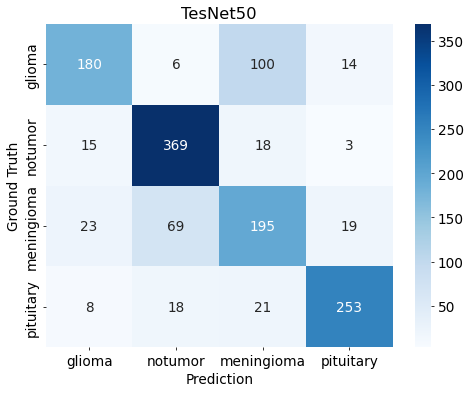

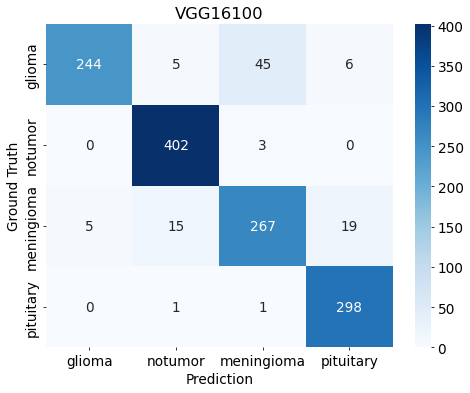

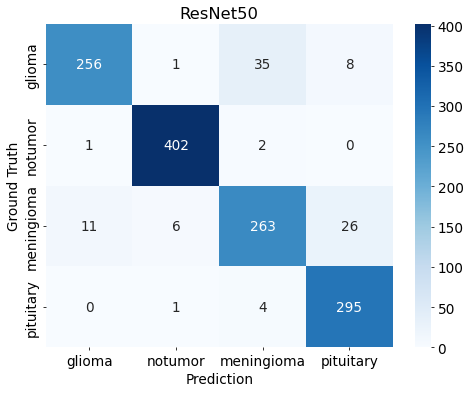

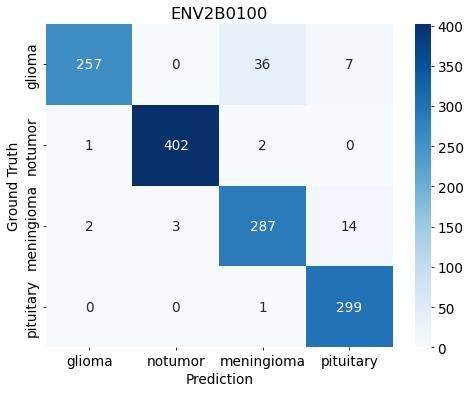

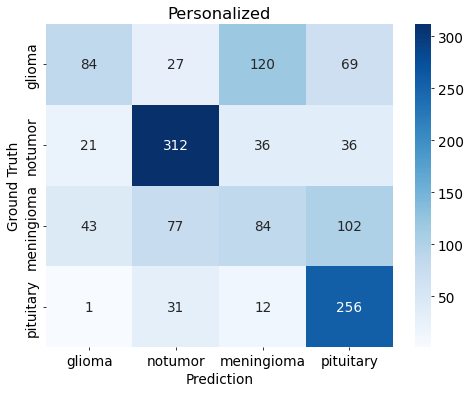

In [ ]:
cnf = confusion_matrix(y_true, y_pred1)
plt.figure(figsize=(8,6), dpi=70, facecolor='w', edgecolor='k')
ax = sns.heatmap(cnf, cmap='Blues', annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
plt.title('TesNet50')
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.show(ax)
cnf = confusion_matrix(y_true, y_pred2)
plt.figure(figsize=(8,6), dpi=70, facecolor='w', edgecolor='k')
ax = sns.heatmap(cnf, cmap='Blues', annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
plt.title('VGG16100')
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.show(ax)
cnf = confusion_matrix(y_true, y_pred3)
plt.figure(figsize=(8,6), dpi=70, facecolor='w', edgecolor='k')
ax = sns.heatmap(cnf, cmap='Blues', annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
plt.title('ResNet50')
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.show(ax)
cnf = confusion_matrix(y_true, y_pred4)
plt.figure(figsize=(8,6), dpi=70, facecolor='w', edgecolor='k')
ax = sns.heatmap(cnf, cmap='Blues', annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
plt.title('ENV2B0100')
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.show(ax)
cnf = confusion_matrix(y_true, y_pred5)
plt.figure(figsize=(8,6), dpi=70, facecolor='w', edgecolor='k')
ax = sns.heatmap(cnf, cmap='Blues', annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
plt.title('Personalized')
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.show(ax)

In [ ]:
print('TesNet50' + classification_report(y_true, y_pred1))
print('-------------------------------------------------------------------------')
print('VGG16100' + classification_report(y_true, y_pred2))
print('-------------------------------------------------------------------------')
print('ResNet50' + classification_report(y_true, y_pred3))
print('-------------------------------------------------------------------------')
print('ENV2B' + classification_report(y_true, y_pred4))
print('-------------------------------------------------------------------------')
print('Personalized' + classification_report(y_true, y_pred5))
print('--------------------------------------------------')

TesNet50              precision    recall  f1-score   support

           0       0.80      0.60      0.68       300
           1       0.80      0.91      0.85       405
           2       0.58      0.64      0.61       306
           3       0.88      0.84      0.86       300

    accuracy                           0.76      1311
   macro avg       0.76      0.75      0.75      1311
weighted avg       0.77      0.76      0.76      1311

-------------------------------------------------------------------------
VGG16100              precision    recall  f1-score   support

           0       0.98      0.81      0.89       300
           1       0.95      0.99      0.97       405
           2       0.84      0.87      0.86       306
           3       0.92      0.99      0.96       300

    accuracy                           0.92      1311
   macro avg       0.92      0.92      0.92      1311
weighted avg       0.93      0.92      0.92      1311

----------------------------------------

In [ ]:
# Columnas de la tabla
t = PrettyTable(['Model', 'Accuracy', 'glioma','meningioma', 'notumor', 'pituitary'])
# To insert rows:
t.add_row(['TesNet50', ])
t.add_row(['VGG16100',  ])
t.add_row(['ResNet50', ])
t.add_row(['ENV2B', ])
t.add_row(['Personalized',  ])
print(t)


+--------------+----------+--------+------------+---------+-----------+
|    Model     | Accuracy | glioma | meningioma | notumor | pituitary |
+--------------+----------+--------+------------+---------+-----------+
|   TesNet50   |   0.77   |  0.8   |    0.8     |   0.58  |    0.88   |
|   VGG16100   |   0.93   |  0.98  |    0.95    |   0.84  |    0.92   |
|   ResNet50   |   0.93   |  0.96  |    0.98    |   0.87  |    0.9    |
|    ENV2B     |   0.95   |  0.99  |    0.99    |   0.88  |    0.93   |
| Personalized |   0.55   |  0.56  |    0.7     |   0.33  |    0.55   |
+--------------+----------+--------+------------+---------+-----------+


<div style="background-color: #60DBD8; color: black; text-align: center; padding: 10px; border-radius: 20px; margin-top: 20px; margin-bottom: 20px;">
  <h2 style="margin: 0;">Markdown</h2>
</div>

[1]	Glickman, C Data Augmentation in Medical Images (2020) https://towardsdatascience.com/data-augmentation-in-medical-images-95c774e6eaae [Last Access: 8 July 2024]
[2]	Karsperowicz,P OpenAI CEO Sam Altman admits his biggest fear for AI: ‘It can go quite wrong’ (2023)
https://www.foxnews.com/politics/openai-ceo-sam-altman-admits-biggest-fear-ai-can-go-quite- wrong [Last Access: 8 July 2024]

[3]	Marr, B The Problem With Biased AIs (and How To Make AI Better) (2022) https://www.forbes.com/sites/bernardmarr/2022/09/30/the-problem-with-biased-ais-and-how-to- make-ai-better/ [Last Access: 8 July 2024]

[4]	Equipo NCI( Instituto nacional del cancer) ¿Sirve la inteligencia artificial para ver el cáncer de formas nuevas y más eficaces? (2022)
https://www.cancer.gov/espanol/noticias/temas-y-relatos-blog/2022/inteligencia-artificial- imagenes-cancer [Last Access: 8 July 2024]

[5]	Equipo NCI( Instituto nacional del cancer) La inteligencia artificial acelera el diagnóstico de tumores cerebrales durante la cirugía
https://www.cancer.gov/espanol/noticias/temas-y-relatos-blog/2020/inteligencia-artificial- diagnostico-cirugia-tumores-cerebrales [Last Access: 8 July 2024]

[6]	Adit Deshpande A Beginner's Guide To Understanding Convolutional Neural Networks (2016) https://adeshpande3.github.io/A-Beginner's-Guide-To-Understanding-Convolutional-Neural- Networks/ [Last Access: 8 July 2024]

[7]	Lebovitz, S Diagnostic Doubt and Artificial Intelligence: An Inductive Field Study of Radiology Work (2019)https://core.ac.uk/download/pdf/301383815.pdf [Last Access: 27 June 2024]

[8]	Marr, B. Green Intelligence: Why Data And AI Must Become More Sustainable (2023) https://www.forbes.com/sites/bernardmarr/2023/03/22/green-intelligence-why-data-and-ai-must- become-more-sustainable/?sh=35b852197658 [Last Access: 25 July 2024]

[9]	Objetivo 3: Garantizar una vida sana y promover el bienestar para todos en todas las edades
https://www.un.org/sustainabledevelopment/es/health/ [Last Access: 14 June 2024]

[10]	Keras Applications
https://keras.io/api/applications/ [Last Access: 28 June 2024]

[11]	Keras https://keras.io/api/ [Last Access: 28 June 2024]

[12]	Tensorflow https://www.tensorflow.org/ [Last Access: 28 June 2024]

[13]	scikit-learn: machine learning in Python — scikit-learn 1.2.2 documentation. [En Línea] https://scikit-learn.org/ [Last Access: 17 June 2024]

[14]	Matplotlib [Online] https://matplotlib.org/ [Last Access: 4 April 2024]

[15]	Numpy [Online] https://numpy.org/ [Último acceso: 8 Junio 2023] [16]Seaborn En Línea] https://seaborn.pydata.org/ [Last Access: 4 April 2024]

[17]Google Colab [Online] https://colab.research.google.com/ [Last Access: 8 June 2024]

[18]Anaconda [Online] https://www.anaconda.com/ [Last Access: 8 June 2024] 

[19]Google drive En Línea] https://www.google.com/drive/ [Last Access: 8 June 2024]

[20]	Brownlee,   J.    How    to    Get    Reproducible    Results    with    Keras    (2017)    En Línea] https://machinelearningmastery.com/reproducible-results-neural-networks-keras/ [Last access: 8 June 2024]

[21]	Simonyan, K., & Zisserman, A. (2014, September 4).[En Línea] [1409.1556] Very Deep Convolutional Networks for Large-Scale Image Recognition. arXiv. https://arxiv.org/abs/1409.1556 [Last Access: 29 June 2024]

[22]	Zhou, V. (n.d.). Machine Learning for Beginners: An Introduction to Neural Networks. Towards Data Science. [En Línea] https://towardsdatascience.com/machine-learning-for- beginners-an-introduction-to-neural-networks-d49f22d238f9 [Last Access: 29 June 2024]

[23]	Kaiming He, Xiangyu Zhang, Shaoqing Ren, Jian Sun [1512.03385] Deep Residual Learning for Image Recognition. (2015, December 10). arXiv. [Online] https://arxiv.org/abs/1512.03385 [Last Access: 29 June 2024]

[24]	Kaiming He, Xiangyu Zhang, Shaoqing Ren, Jian Sun [1603.05027] Identity Mappings in Deep Residual Networks. (2016, March 16). arXiv. [Online] https://arxiv.org/abs/1603.05027 [Last Access: 29 June 2024]

[25]	Tan, M., & ., Q. V. (2021, April 1). [2104.00298] EfficientNetV2: Smaller Models and Faster Training. arXiv. Retrieved June 8, 2023. [Online] https://arxiv.org/abs/2104.00298 [Last Access: 29 June 2024]

[26]	Cai, L., Gao, J., & Zhao, D. (2020). A review of the application of deep learning in medical image classification and segmentation. Annals of translational medicine, 8(11), 713. [Online] https://doi.org/10.21037/atm.2020.02.44 [Last Access: 29 June 2024]

[27]	Kavlakoglu, E. AI vs. Machine Learning vs. Deep Learning vs. Neural Networks: What’s the Difference? (2020). [Online]

https://www.ibm.com/cloud/blog/ai-vs-machine-learning-vs-deep-learning-vs-neural-networks [Last Access: 2 May 2024]

[28]	Matt.    Artificial   Intelligence,   Enough   of   the   hype!   What   is   it?   (2019)    [Online]	https://community.hpe.com/t5/hpe-blog-uk-ireland-middle-east/artificial-intelligence- enough-of-the-hype-what-is-it/ba-p/7046672 [Last Access: 29 Feb 2024]

[29]	Daniel, J. Convolutional Neural Networks- Deep Learning (2020) [Online] https://jackdani.medium.com/convolutional-neural-networks-deep-learning-e25ec74697ae [Last Access: 29 June 2024]

[30]	Domanska,O.   Machine   Learning   vs    Traditional    Programming    (2021)    [Online] https://www.avenga.com/magazine/machine-learning-programming/ [Last Access: 29 June 2024]

[31]	Sarvamangala, D.R., Kulkarni, R.V. Convolutional neural networks in medical image understanding: a survey. Evol. Intel. 15, 1–22 (2022). [Online] https://doi.org/10.1007/s12065- 020-00540-3 [Last Access: 29 June 2024]

[32]	Jaber, N. Can Artificial Intelligence Help See Cancer in New, and Better, Ways?
(2022) [Online]	https://www.cancer.gov/news-events/cancer-currents-blog/2022/artificial- intelligence-cancer-imaging [Last Access: 29 June 2024]

[33]	INTELIGENCIA ARTIFICIAL Y MEDICINA GENÓMICA(2022) [En Línea] https://blog.nuevamutuasanitaria.es/2022/03/22/inteligencia-artificial-y-medicina-genomica/ [Last Access: 29 June 2024]

[34]	Los ojos como reflejo de enfermedades cardiovasculares y neurológicas(2022) [En Línea] https://www.rocheplus.es/innovacion/inteligencia-artificial/el-ojo.html [Last Access: 25 July 2024]

[35]	Inteligencia artificial y cirugía: la revolución de la medicina de precisión (2020) [En Línea]	https://www.elsevier.es/en-revista-journal-healthcare-quality-research-257-articulo- inteligencia-artificial-cirugia-revolucion-medicina-S2603647920300555 [Last Access: 25 July 2024]

[36]	¿Qué es la inteligencia artificial en la medicina? [En Línea]	https://www.ibm.com/mx- es/topics/artificial-intelligence-medicine#:~:text=Adem%C3%A1s%20de%20ayudar%20a%20los,y%20presentarles%20las%2 0im%C3%A1genes%20relevantes. [Last Access: 25 July 2024]

[37]	Algunas cuestiones sobre la IA en medicina
(2023) [En Línea]	https://salud-digital.es/2023/05/11/algunas-cuestiones-sobre-la-ia-en- medicina/ [Last Access: 25 July 2024]

[38]	Brownlee, J. How to Normalize, Center, and Standardize Image Pixels in Keras (2019) [Online]
https://machinelearningmastery.com/how-to-normalize-center-and-standardize-images-with-the- imagedatagenerator-in-keras/ [Last Access: 25 July 2024]

[39]	Convolutional Neural Network: Benefits, Types, and Applications [Online] https://datagen.tech/guides/computer-vision/cnn-convolutional-neural- network/#:~:text=Benefits%20of%20Using%20CNNs%20for%20Machine%20and%20Deep%20 Learning,- Deep%20learning%20is&text=The%20CNN%20architecture%20is%20especially,and%20produ ce%20highly%20accurate%20predictions. [Last Access: 25 July 2024]

[40]	Donges, N. What Is Transfer Learning? Exploring the Popular Deep Learning Approach. (2022) [Online]	https://builtin.com/data-science/transfer-learning [Last Access: 25 July 2024]

[41]	Top 5 Programming Language for Artificial Intelligence and Deep Learning in 2023 (2022) [Online]
https://medium.com/javarevisited/top-5-programming-language-for-artificial-intelligence-ai-and- machine-learning-fccd3e6da809 [Last Access: 25 July 2024]

[42]	Kumar, A Why use Random Seed in Machine Learning? (2021) [Online] https://vitalflux.com/why-use-random-seed-in-machine-learning/ [Last Access: 25 July 2024]

[43]	Brownlee, J. Why One-Hot Encode Data in Machine Learning? (2017) [Online] https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/[Last Access: 25 July 2024]

[44]	Pramoditha, R. Encoding Categorical Variables: One-hot vs Dummy Encoding [Online] https://towardsdatascience.com/encoding-categorical-variables-one-hot-vs-dummy-encoding- 6d5b9c46e2db [Last Access: 13 May 2024]

[45]	Brownlee, J. How to Configure Image Data Augmentation in Keras (2019) [Online]
https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training- deep-learning-neural-networks/ [Last Access: 25 July 2024]

[46]	Madhugiri, D . Learn Image Augmentation Using 3 Popular Python Libraries ( 2022) [Online]
https://www.analyticsvidhya.com/blog/2022/04/image-augmentation-using-3-python-libraries/ [Last Access: 25 May 2024]
[47]	Glickman, C. Data Augmentation in Medical Images [Online] https://towardsdatascience.com/data-augmentation-in-medical-images-95c774e6eaae	[Last Access: 25 July 2024]

[48]	ImageNet (2021) [En Línea]	https://www.image-net.org/ [Last Access: 5 April 2024]

[49]	Matsoukas, C. Haslum, J. What Makes Transfer Learning Work For Medical Images: Feature Reuse & Other Factors (2022) [Online]
https://arxiv.org/abs/2203.01825 [Last Access: 5 April 2024]

[50]	Brownlee, J Difference Between a Batch and an Epoch in a Neural Network [Online] https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/	[Last Access: 18 May 2024]

[51]	Lackshmanan, L. ML Design Pattern #2: Checkpoints [Online] https://towardsdatascience.com/ml-design-pattern-2-checkpoints- e6ca25a4c5fe#:~:text=A%20checkpoint%20is%20an%20intermediate,from%20this%20point%2 0whenever%20desired. [Last Access: 18 May 2024]

[52]	Brownlee, J. A Gentle Introduction to Dropout for Regularizing Deep Neural Networks (2018) [Online]
https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/ [Last Access: 5 April 2024]

[53]	Classification:Accuracy [Online]	https://developers.google.com/machine-learning/crash- course/classification/accuracy [Last Access: 5 April 2024]

[54]	Understanding ML Evaluation Metrics — Precision & Recall (2019) [Online] https://aigraduate.com/understanding-ml-evaluation-metrics---precision---recall/ [Last Access: 5 April 2024]

[55]	Gupta, L. Precision-Recall Tradeoff in Real-World Use Cases (2021) [Online] https://medium.com/analytics-vidhya/precision-recall-tradeoff-for-real-world-use-cases- c6de4fabbcd0 [Last Access: 25 July 2024]
[56]	Consistency	training	with	supervision	[Online]	https://keras.io/examples/vision/consistency_training/ [Last Access: 25 July 2024]

[57]	Jain, M. Knowledge Distillation, aka Teacher-Student Model [Online] https://ai.plainenglish.io/knowledge-distillation-aka-teacher-student-model-4f16f701ac79 [Last Access: 25 July 2024]

[58]	Biewald, L. Deep Learning and Carbon Emissions ( 2019) [Online] https://towardsdatascience.com/deep-learning-and-carbon-emissions-79723d5bc86e	[Last Access: 25 July 2024]

[59]	Google Trends [En Línea] https://trends.google.com/trends/ [Last Access: 25 July 2024]

[60]	Brain	Tumor	MRI	Dataset	[Online] https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset [Last Access: 25 July 2024]
